Name:   Anh Tuan Tran
Matrikelnummer:  7015463
Email:   antr00001@stud.uni-saarland.de
   
Name:   Deborah Dormah Kanubala
Matrikelnummer:   7025906
Email:  dkanubala@aimsammi.org

Name:    Irem Begüm Gündüz
Matrikelnummer:     7026821
Email: irgu00001@stud.uni-saarland.de

#### Preamble

In [1]:
# TODO: Import necessary libraries

import torch
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU 
from torch.nn.functional import softmax
import torch.nn as nn
import numpy as np
#from torch import flatten


/home/tuan/envs/nerf-pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 9.2 Design your CNN (4 points )

Please create a ```solution.py``` file where you define the following:


1. A ```function``` where you use pytorch's Dataset and Dataloader class, and it should return you the desired split for the dataset. The function should have ```split``` as one of its argument and the call to Dataset class should respect this argument. The desired role of function is as follows:
    - Load the ```SVHN``` dataset using the built-in PyTorch datasets and data loaders.
    - Preprocess the data as needed, such as by resizing, cropping, and normalizing the images.
    - Returns the Dataloader object for specified split
    - **(Optional)** Try incorporating different transform based on whether it's **train / test / extra** ```split``` of dataset you are using. You are free to scour internet for this, but be sure to cite if you end up using someone else's code. You should also be able to explain **why** using different transform functions could be useful and what advantage your particular implementation has.
    
2. A ```class``` for your implementation of CNN which does the following:
    - Define the CNN model architecture, including the choice of layers, kernel size, and number of filters.
    - **(Optional)** treat number of layers, kernel size, filters, padding etc as arguments when you are defining your class. This would help you create different networks without having the need to edit ```solution.py``` file.
    



### Answer Question one:


**Gray scale transformation:** The colors of the numbers are complex in each image and make the problem harder while provide little information, therefore we use grayscale transformation

### 2. A CNN Class Implementation


Define the CNN model architecture, including the choice of layers, kernel size, and number of filters.
(Optional) treat number of layers, kernel size, filters, padding etc as arguments when you are defining your class. This would help you create different networks without having the need to edit solution.py file.

In [2]:
#Run the solution.py script to load the svhn data

from solution import load_data_svhn, CNN_model
#CNN_model

train_loader = load_data_svhn(split = "train", batch_size=128)
test_loader = load_data_svhn(split = "test")


Using downloaded and verified file: path/to/data/train_32x32.mat
Using downloaded and verified file: path/to/data/test_32x32.mat


In [3]:
y = next(iter(train_loader))[0]

In [4]:
model = CNN_model(in_channels=1, 
    num_blocks=3, 
    kernel_size=3, 
    filter_size=32, 
    num_classes=10,
    pool_size=4)
model

CNN_model(
  (cnn_blocks): Sequential(
    (0): BlockCNN(
      (conv_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU()
    )
    (1): BlockCNN(
      (conv_1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU()
    )
    (2): BlockCNN(
      (conv_1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU()
    )
  )
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=Fals

In [5]:
output_= model.forward(y)
output_.shape

torch.Size([128, 10])

### Train your model(s) by importing your implementation from ```solution.py``` file in this notebook

- Define a loss function and optimizer for training the model.
- Train the model on the training data and evaluate its performance on the validation data.
- Adjust the hyper-parameters and model architecture as needed to improve performance.
- Test the different models on the test data and report the results. Do you see a relation of hyper-parameter tuning w.r.t. your design choices for the network?
- **Optionally** Briefly explain your observations from the last point. You may also want to consider evaluating the model on additional benchmarks or real-world tasks to demonstrate its performance in different settings to present during tutorials. You will receive an **additional bonus** point for this.

In [6]:
# TODO: Run your experiments and plot the results

In [16]:
import torch.optim as optim
import matplotlib.pyplot as plt


def train_loop(data, model, loss_fn, optimizer, device, num_epoch=10, batch_size=128, first_batch_only=False):  
    model.train ()
    train_losses = []
    accs = [] 
    for i_epoch in range (num_epoch):
        optimizer.zero_grad()
        epoch_losses = []
        for i, (images, labels) in enumerate(data):
            # Move images and labels to device
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass
            outputs_ = model(images)
            loss = loss_fn(outputs_, labels)

            pred = torch.argmax (outputs_, -1)
            accuracy = torch.sum (labels == pred) / len (pred) 
            accs.append (accuracy.detach().cpu().numpy())

            # Backward and optimize
            loss.backward()
            optimizer.step()
            epoch_losses.append (loss.detach().cpu().numpy ())
            if first_batch_only:
                break

        if (i_epoch+1) % 2 == 0:
            print ("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Acc: {:.4f}"
                   .format(i_epoch+1, num_epoch, i+1, len(data)//batch_size, loss.item(), accuracy))
        train_losses.append (np.mean (epoch_losses))
        
            
    plt.plot (train_losses)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show ()
    
    plt.plot (accs)
    plt.xlabel("epochs")
    plt.ylabel("epoch accuracy")
    plt.show ()
            
            
def evaluation(val_loader, model, loss_fn, device):
    # Evaluate the model on the test data
    model.eval()
    size = len(val_loader)
    total, correct = 0, 0
    i = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            # Move images and labels to device
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Validation Accuracy of the model on the validation images: {} %'.format(100 * correct / total))
 

#### Checking training correctness by over-fitting only the first batch 

Epoch [2/100], Step [1/4], Loss: 6.1627, Acc: 0.1953
Epoch [4/100], Step [1/4], Loss: 3.0401, Acc: 0.1406
Epoch [6/100], Step [1/4], Loss: 2.4876, Acc: 0.2031
Epoch [8/100], Step [1/4], Loss: 2.3059, Acc: 0.1953
Epoch [10/100], Step [1/4], Loss: 2.2865, Acc: 0.1875
Epoch [12/100], Step [1/4], Loss: 2.1884, Acc: 0.1562
Epoch [14/100], Step [1/4], Loss: 2.1841, Acc: 0.1953
Epoch [16/100], Step [1/4], Loss: 2.1484, Acc: 0.1953
Epoch [18/100], Step [1/4], Loss: 2.1376, Acc: 0.2109
Epoch [20/100], Step [1/4], Loss: 2.1243, Acc: 0.2188
Epoch [22/100], Step [1/4], Loss: 2.1060, Acc: 0.2578
Epoch [24/100], Step [1/4], Loss: 2.1014, Acc: 0.2422
Epoch [26/100], Step [1/4], Loss: 2.0796, Acc: 0.2734
Epoch [28/100], Step [1/4], Loss: 2.0685, Acc: 0.2578
Epoch [30/100], Step [1/4], Loss: 2.0549, Acc: 0.2656
Epoch [32/100], Step [1/4], Loss: 2.0349, Acc: 0.2656
Epoch [34/100], Step [1/4], Loss: 2.0163, Acc: 0.2734
Epoch [36/100], Step [1/4], Loss: 1.9918, Acc: 0.2891
Epoch [38/100], Step [1/4], Loss

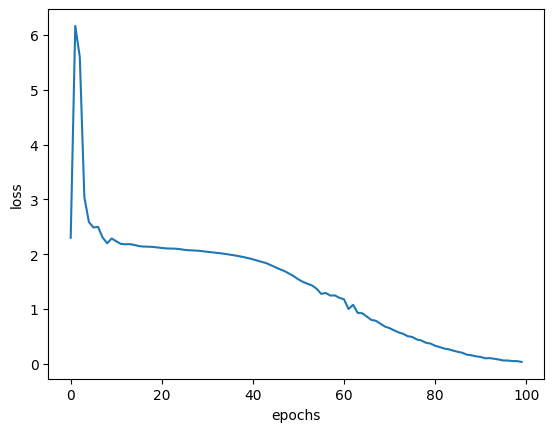

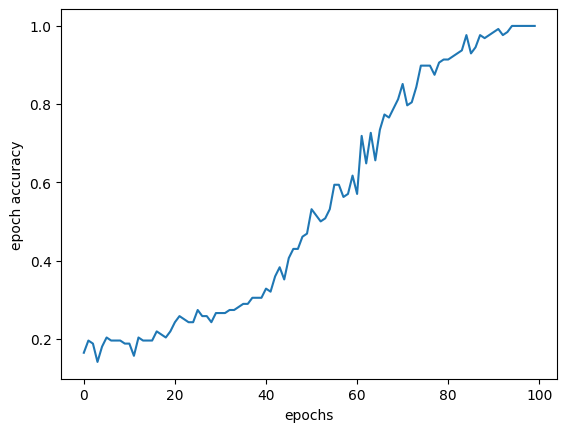

In [17]:
#train the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
model = CNN_model(in_channels=1, 
    num_blocks=1, 
    kernel_size=3, 
    filter_size=128, 
    num_classes=10,
    pool_size=2,)
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loop(train_loader, model, loss_fn, optimizer, device, num_epoch=100, first_batch_only=True) 

#### Full data training (need much more training time for convergence and better results). Due to limited computation resource, we only compute up to 4 epochs

Epoch [2/4], Step [573/4], Loss: 2.3290, Acc: 0.1707
Epoch [4/4], Step [573/4], Loss: 2.3008, Acc: 0.1707


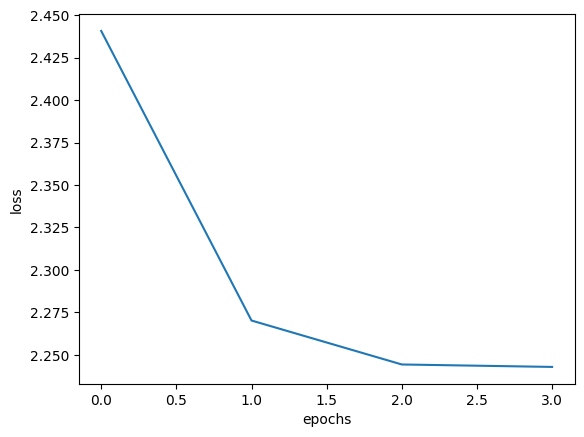

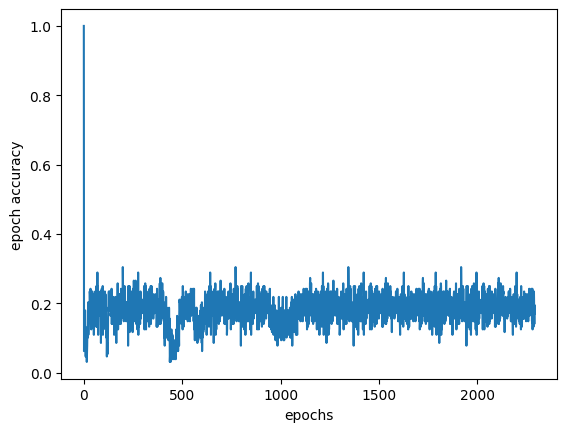

In [18]:
#train the model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loop(train_loader, model, loss_fn, optimizer, device, num_epoch=4, first_batch_only=False) 

In [19]:
# evaluate the model

evaluation(test_loader, model, loss_fn, device)

Validation Accuracy of the model on the validation images: 19.587430854333128 %


### Observation

1. We notice that learning rate is important for the training. With only first batch training, if lr=1e-4 or 1e-2 then the model cannot overfit to 100% accurracy after 100 iterations but ended up with a very poor result.

2. Deeper model or larger filter size may make it harder to overfit. Again with only first batch of the data overfitting, if we increase the number of convolution blocks (more than 5) or filter size (larger than 64), the model converge much slower.

## BONUS (1.5 + 1.5 points)
- Recall the custom Dataset and DataLoaders exercise from the first assignment? Create a custom data-loading pipeline (i.e. Dataset and Dataloader) to be used with your model. Implement the transform functionality as collate_fn. (0.5 + 1)
- Consider using a pre-trained model as a starting point and fine-tuning it on the SVHN dataset. Briefly contrast the performance with your design choices to justify the gain or loss in performance.

Here are some tutorials for finetuning pre-trained models: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html & https://huggingface.co/docs/transformers/training

In [102]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

class SVHNDataset(Dataset):
    def __init__(self, data_path, transform=None, split='train'):
        self.transform = transform
        self.data = datasets.SVHN(root='path/to/data', split=split, download=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data [idx]
        if self.transform:
            img = self.transform(img)
        return img, label

    
def collate_fn(batch):
    imgs = []
    labels = []
    
    for img, label in batch:
        imgs.append (img [None])
        labels.append (label)
        
    imgs = torch.cat (imgs)    
    labels = torch.tensor (labels, dtype=torch.long)
    
    return (imgs, labels)

def svhn_data_loader(data_path, batch_size, transform=None, split='train'):
    dataset = SVHNDataset(data_path, transform, split=split)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, collate_fn=collate_fn)
    return dataloader


# Define the transform to be applied to the dataset
transform = transforms.Compose([
    transforms.transforms.Grayscale(1),
    transforms.ToTensor(),
])

# Dataloader
data_path = 'path/to/data/'
train_loader1 = svhn_data_loader(data_path,  batch_size=64, transform=transform, split='train')
eval_loader1 = svhn_data_loader(data_path,  batch_size=32, transform=transform, split='test')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(42)
criterion = nn.CrossEntropyLoss()

Using downloaded and verified file: path/to/data/train_32x32.mat
Using downloaded and verified file: path/to/data/test_32x32.mat


#### First batch only fitting (up to 4 epoch)

Epoch [2/4], Step [1/17], Loss: 1.1344, Acc: 0.6562
Epoch [4/4], Step [1/17], Loss: 0.0393, Acc: 1.0000


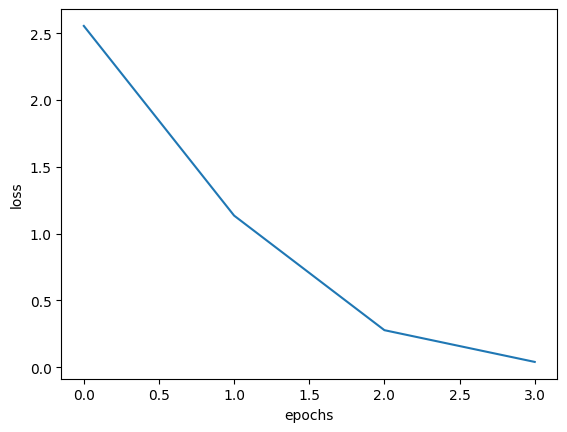

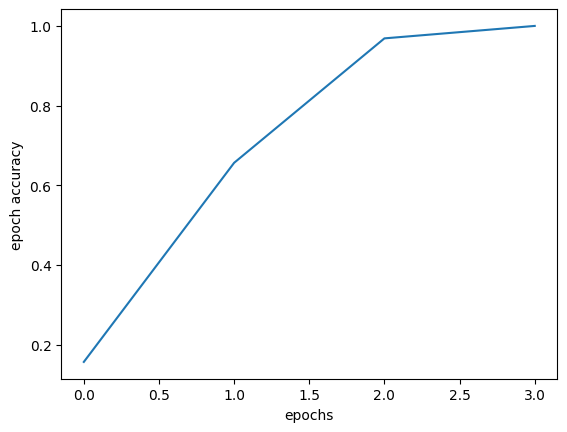

Validation Accuracy of the model on the validation images: 9.684234787953288 %


In [109]:
torch.manual_seed(42)
resnet_model = models.resnet18(pretrained=True).to(device)
resnet_model.conv1 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet_model.fc = nn.Linear (512, 10)
resnet_model.train ()
resnet_model = resnet_model.to(device)
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=1e-3)

# Train the model
train_loop(train_loader1, resnet_model, loss_fn, optimizer, device, num_epoch=4, first_batch_only=True) 

#Evaluate the model
evaluation(eval_loader1, resnet_model, loss_fn, device)

#### Full data fitting (up to 4 epoch)

Epoch [2/4], Step [2290/17], Loss: 2.4679, Acc: 0.1111
Epoch [4/4], Step [2290/17], Loss: 2.3589, Acc: 0.1111


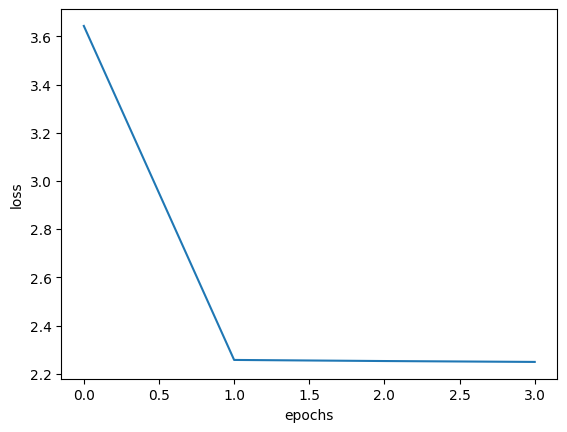

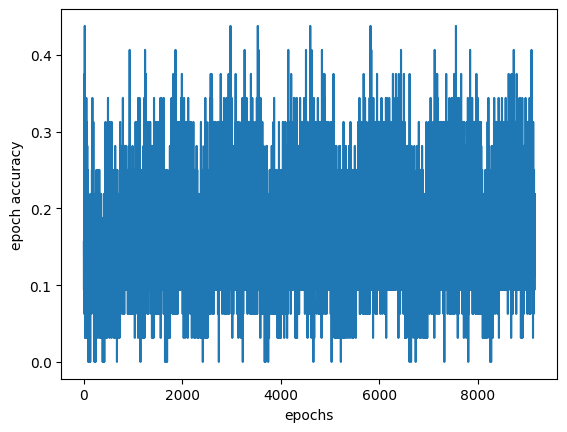

Validation Accuracy of the model on the validation images: 19.587430854333128 %


In [110]:
torch.manual_seed(42)
resnet_model = models.resnet18(pretrained=True).to(device)
resnet_model.conv1 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet_model.fc = nn.Linear (512, 10)
resnet_model.train ()
resnet_model = resnet_model.to(device)
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=1e-3)

# Train the model
train_loop(train_loader1, resnet_model, loss_fn, optimizer, device, num_epoch=4, first_batch_only=False) 

#Evaluate the model
evaluation(eval_loader1, resnet_model, loss_fn, device)